In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
df=pd.read_csv("/content/predict_energy_consumption.xls")

In [24]:
df.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [25]:
df.shape

(1000, 5)

In [26]:
df.columns

Index(['temperature', 'humidity', 'wind_speed', 'solar_irradiance',
       'energy_consumption'],
      dtype='object')

In [27]:
x=df[['temperature', 'humidity', 'wind_speed', 'solar_irradiance']].values
y=df['energy_consumption'].values


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [29]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [30]:
model=Sequential([
    Dense(64,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [33]:
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 93425.8047 - mae: 276.5730 - val_loss: 83631.0000 - val_mae: 258.8833
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 87963.4141 - mae: 267.4576 - val_loss: 82969.2969 - val_mae: 257.6022
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 88711.0078 - mae: 268.8951 - val_loss: 81929.3359 - val_mae: 255.5779
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 90006.5547 - mae: 270.4135 - val_loss: 80332.3750 - val_mae: 252.4350
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 84546.5703 - mae: 261.2817 - val_loss: 78028.5781 - val_mae: 247.8263
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 84000.2578 - mae: 260.9440 - val_loss: 74849.5391 - val_mae: 241.3130
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 81693.3047 - mae: 253.7499 - val_loss: 70694.2656 - val_mae: 232.5203
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 71388.4844 - mae: 235.7711 - val_loss: 65558.

In [34]:
test_loss,test_mae=model.evaluate(x_test,y_test,verbose=1)
print(f'{test_mae:.2f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 18193.1816 - mae: 115.8144
115.61


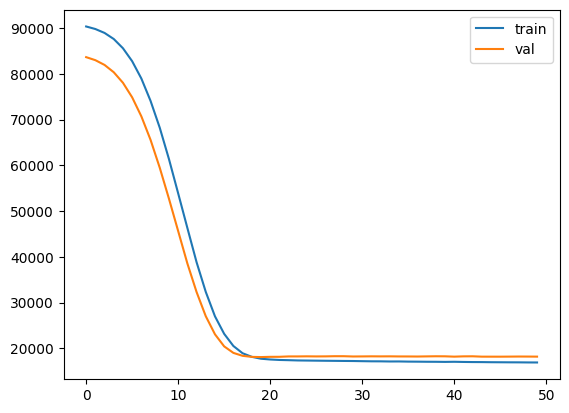

In [35]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()
plt.show()

In [36]:
predictions= model.predict(x_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


array([[281.06848],
       [255.99329],
       [249.49915],
       [209.57373],
       [334.61935],
       [303.50723],
       [314.98404],
       [294.7575 ],
       [282.8612 ],
       [272.2237 ],
       [236.65271],
       [263.5455 ],
       [285.7321 ],
       [230.2031 ],
       [308.35303],
       [305.36563],
       [261.53336],
       [311.13187],
       [291.16446],
       [240.639  ],
       [269.6201 ],
       [276.78455],
       [274.29446],
       [279.1376 ],
       [245.4961 ],
       [243.05301],
       [254.6159 ],
       [306.66223],
       [305.7904 ],
       [270.83838],
       [234.06342],
       [300.6282 ],
       [286.31647],
       [276.64194],
       [322.17685],
       [290.2684 ],
       [217.41507],
       [262.83353],
       [278.99384],
       [233.25623],
       [249.01962],
       [255.95676],
       [244.33415],
       [266.30563],
       [259.60153],
       [258.4173 ],
       [257.38614],
       [260.40533],
       [285.98016],
       [294.75095],


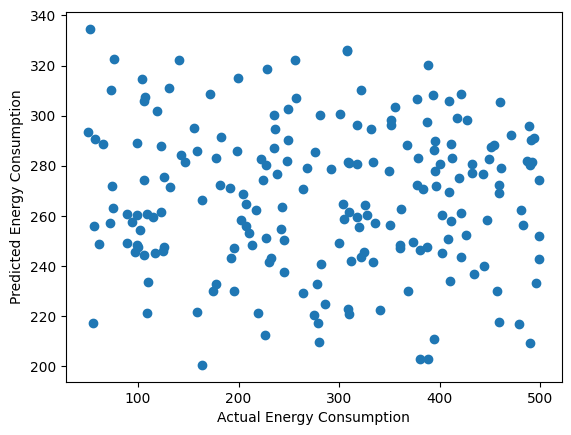

In [37]:
plt.scatter(y_test,predictions)
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.show()

In [38]:
model1=Sequential([
    Dense(128,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model1.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [42]:
history1=model1.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 90049.4609 - mae: 271.4360 - val_loss: 82520.9297 - val_mae: 256.7090
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 87088.8984 - mae: 267.4774 - val_loss: 78063.2422 - val_mae: 247.8035
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 78464.5078 - mae: 250.6000 - val_loss: 65896.5859 - val_mae: 221.5972
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 67900.4922 - mae: 225.8179 - val_loss: 42736.4766 - val_mae: 168.3158
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39061.9766 - mae: 161.8440 - val_loss: 21434.8633 - val_mae: 119.3059
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20331.9375 - mae: 120.6719 - val_loss: 20220.9473 - val_mae: 120.8228
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18034.5508 - mae: 115.3048 - val_loss: 19070.4512 - val_mae: 118.0764
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18267.1816 - mae: 116.7572 - val_loss: 18864.

In [43]:
test_loss,test_mae=model1.evaluate(x_test,y_test,verbose=1)
print(f'{test_mae:.2f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 17953.9668 - mae: 114.7191
114.84


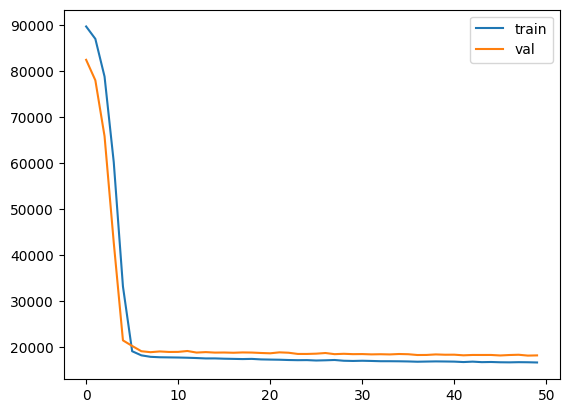

In [44]:
plt.plot(history1.history['loss'],label='train')
plt.plot(history1.history['val_loss'],label='val')
plt.legend()
plt.show()